# 多层感知机
### 线性模型可能会出错
线性意味着单调假设,有很多违反单调性假设的例子,根据体温预测死亡率,对于体温高于37度的人来说温度越高死亡率越高,对于体温低于37度的人来说,温度稍高一点风险反而会越低,因此通过一些预处理解决问题,例如使用与37摄氏度的距离作为特征.
大多数时候我们难以通过简单的预处理来解决这个问题,我们的数据可能会有一种表示,这种表示会考虑到我们在特征之间的相关交互作用,在此基础上建立一个线性模型可能是合适的,对于深度神经网络,我们使用观测数据来联合学习隐藏层表示和应用于该表示的线性预测器。
### 在网络中加入隐藏层
在网络中加入一个或多个隐藏层来克服线性模型的限制,使其能处理更普遍的函数关系类型,最简单的方法是将许多全连接层堆叠到一起,每一层都输出到上面的层,直到最后的输出,把前面的L-1层看作表示,最后一层看作线性预测器.
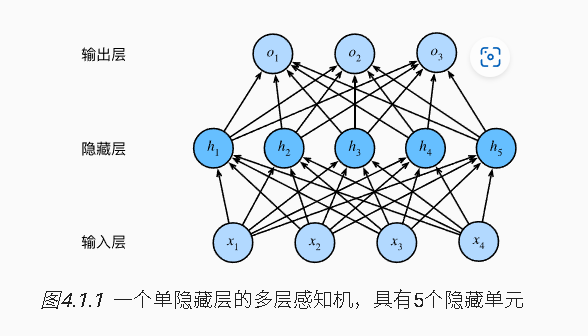
这个多层感知机具有4个输入,3个输出,隐藏层包含5个隐藏单元,这个多层感知机中的层数为2,每个输入都会影响到隐藏层中每个神经元,隐藏中的每个神经元又会影响输出层的每个神经元.
具有全连接层的多层感知机的参数开销可能会高的令人望而却步.
### 从线性到非线性
 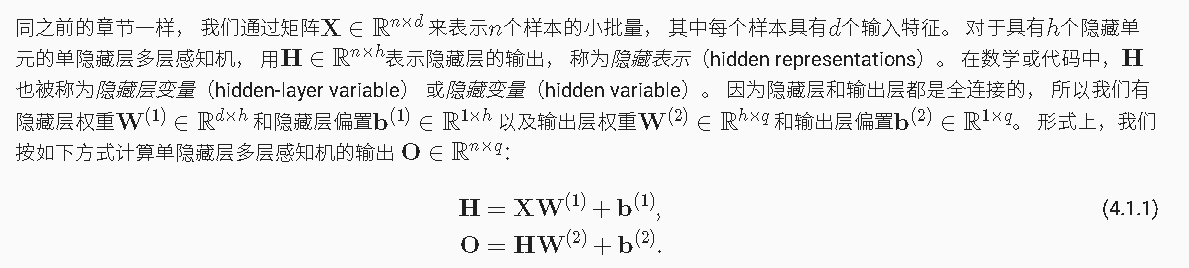又多了一层,参数也多了一倍,由于是全连接,就是相当于两个线性.
 如果我们合并隐藏层,我们就可以找到一个等价单层模型.
## 激活函数
#### ReLU函数

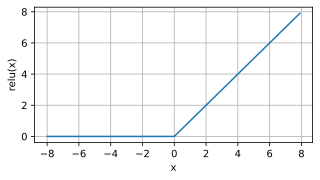

In [14]:
%matplotlib inline
import torch
from d2l import torch as d2l

x=torch.arange(-8.0,8.0,0.1,requires_grad=True)
y=torch.relu(x)
d2l.plot(x.detach(),y.detach(),'x','relu(x)',figsize=(5,2.5))

ReLU函数保留所有的正元素,丢弃所有的负元素,使用ReLU的原因是,它求导表现得特别好,要么让参数消失,要么让参数通过,减轻了以往神经网络的梯度消失问题.

#### sigmod函数
挤压函数,将范围压缩到区间(0,1)之间
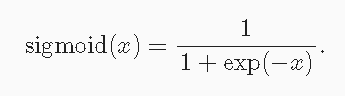
绘制sigmod函数

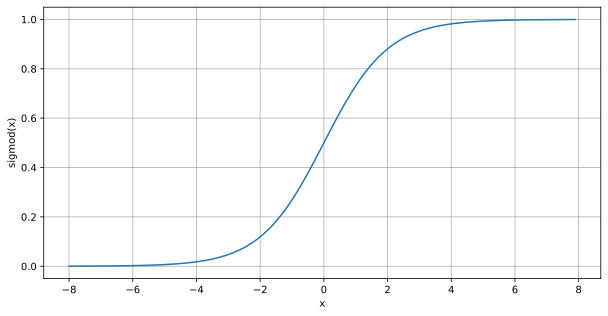

In [15]:
y=torch.sigmoid(x)
d2l.plot(x.detach(),y.detach(),'x','sigmod(x)',figsize=(10,5))

#### tanh函数
双曲正切函数也能将输入压缩到区间(-1,1)之间
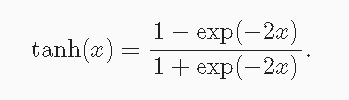
绘制双曲正切函数

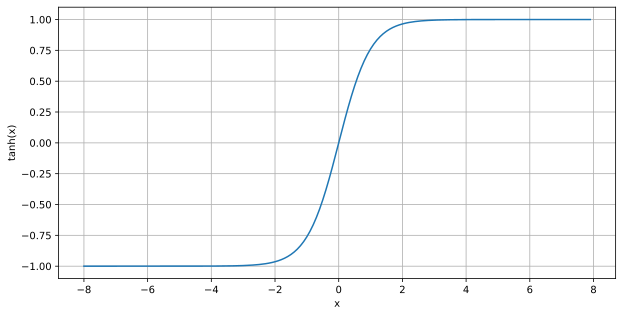

In [16]:
y=torch.tanh(x)
d2l.plot(x.detach(),y.detach(),'x','tanh(x)',figsize=(10,5))

## 多层感知机的从零开始实现
Fahion-MNIST中的图像由28x28个灰度像素值构成,图像分为十个类别,我们实现一个具有单隐藏层的多层感知机,包含256个隐藏单元,通常我们选择2的若干次幂作为层的宽度,因为内存在硬件中的分配和寻址方式,这样做往往可以在计算上更加高效.

w1是784x256的权重矩阵,b1是256的偏置向量
w2是256x10的权重矩阵,b2是10的偏置向量

#### 定义激活函数
自己实现

#### 模型
使用reshape函数将每个二维图像转换为一个长度为num_inputs的向量

#### 损失函数
我们直接使用高级API中的内置函数来计算softmax和交叉熵损失

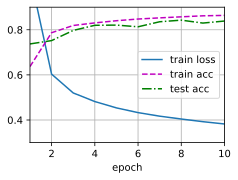

In [28]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

def relu(X):
    a=torch.zeros_like(X) #创建一个与X形状完全相同的全0向量
    return torch.max(X,a)

def net(X):
    X=X.reshape((-1,num_inputs))
    H=relu(X@W1+b1) # @代表据矩阵乘法
    return (H@W2+b2)

loss=nn.CrossEntropyLoss()
num_epochs, lr = 10, 0.1 #迭代周期为10,学习率为0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)